In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
compras = pd.read_excel('/content/drive/MyDrive/Shareddrives/gestion &almacenamiento/Taller semana 7 /Clientes_transformados.xlsx')

In [4]:
compras.head()

,ID Compra,Nombre,Apellido,Electrodoméstico,Cantidad,Valor Unitario,Valor Total,Fecha Compra,Hora Compra,Ano_de_compra,Mes_de_compra,Hora,Categoria,Valor_medio
0,CL-00001,Marcia,Parra,Nevera,5,1800000,9000000,2023-07-12,1900-01-01 03:27:54,2023,7,3,Cocina,1800000
1,CL-00002,Alfonso,Roma,Plancha,1,150000,150000,2023-01-16,1900-01-01 04:34:05,2023,1,4,Aseo,150000
2,CL-00004,Gonzalo,Sebastián,Licuadora,3,250000,750000,2024-05-23,1900-01-01 15:39:00,2024,5,15,Cocina,250000
3,CL-00005,Ambrosio,Prat,Lavadora,5,1500000,7500000,2022-09-08,1900-01-01 13:57:58,2022,9,13,Aseo,1500000
4,CL-00006,Roldán,Elías,Nevera,5,1800000,9000000,2022-09-20,1900-01-01 05:07:39,2022,9,5,Cocina,1800000


In [5]:
compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11233 entries, 0 to 11232
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID Compra         11233 non-null  object        
 1   Nombre            11233 non-null  object        
 2   Apellido          11233 non-null  object        
 3   Electrodoméstico  11233 non-null  object        
 4   Cantidad          11233 non-null  int64         
 5   Valor Unitario    11233 non-null  int64         
 6   Valor Total       11233 non-null  int64         
 7   Fecha Compra      11233 non-null  datetime64[ns]
 8   Hora Compra       11233 non-null  datetime64[ns]
 9   Ano_de_compra     11233 non-null  int64         
 10  Mes_de_compra     11233 non-null  int64         
 11  Hora              11233 non-null  int64         
 12  Categoria         11233 non-null  object        
 13  Valor_medio       11233 non-null  int64         
dtypes: datetime64[ns](2), 

# Pregunta 1
¿Cuál es el electrodoméstico más vendido por cantidad?

In [8]:
# Agrupar y ordenar los datos
ventas_por_producto = compras.groupby('Electrodoméstico')['Cantidad'].sum().sort_values(ascending=False)

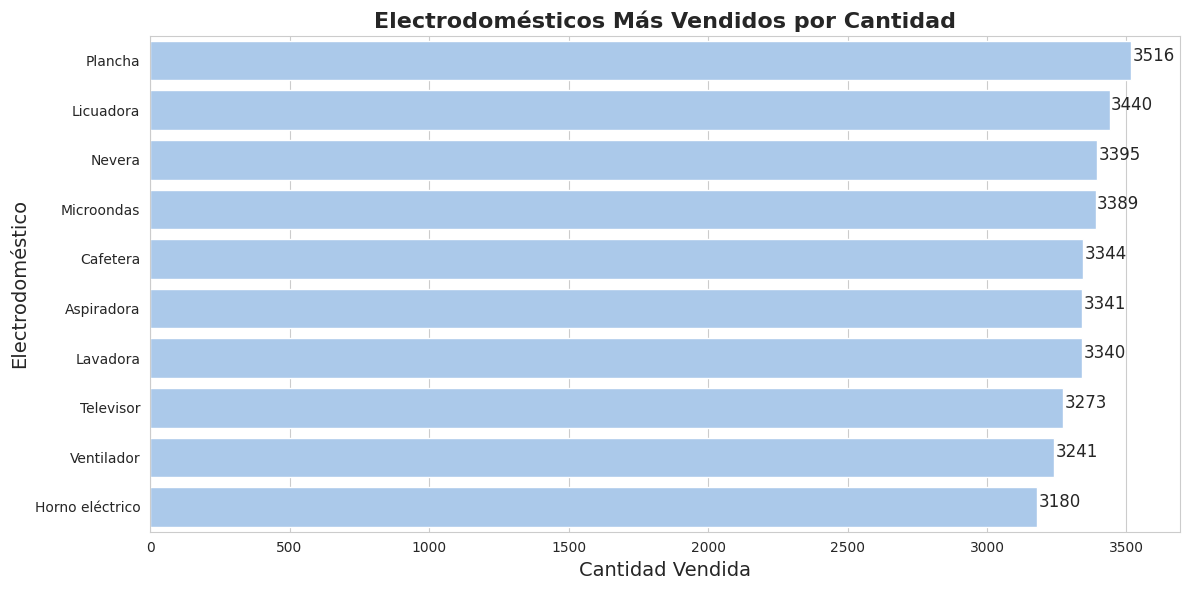

In [12]:
# Configurar estilo de Seaborn
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Crear la figura
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=ventas_por_producto.values, y=ventas_por_producto.index)

# Personalizar etiquetas y título
ax.set_xlabel("Cantidad Vendida", fontsize=14)
ax.set_ylabel("Electrodoméstico", fontsize=14)
ax.set_title("Electrodomésticos Más Vendidos por Cantidad", fontsize=16, fontweight="bold")

# Agregar valores en las barras
for i in range(len(ventas_por_producto)):
    ax.text(ventas_por_producto.values[i] + 5, i, str(ventas_por_producto.values[i]), ha='left', fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

# Pregunta 2
¿Cuál generó más ingresos (Valor Total)?

In [ ]:
resultados = compras.groupby('Electrodoméstico')['Valor Total'].sum().sort_values(ascending=False)
# Aplicar formato de miles
resultados_formateados = resultados.apply(lambda x: f"${x:,.0f}")
resultados_formateados

,Valor Total
Electrodoméstico,
Nevera,"$6,111,000,000"
Lavadora,"$5,010,000,000"
Televisor,"$3,927,600,000"
Aspiradora,"$2,004,600,000"
Horno eléctrico,"$1,590,000,000"
Microondas,"$1,355,600,000"
Cafetera,"$1,003,200,000"
Licuadora,"$860,000,000"
Ventilador,"$648,200,000"


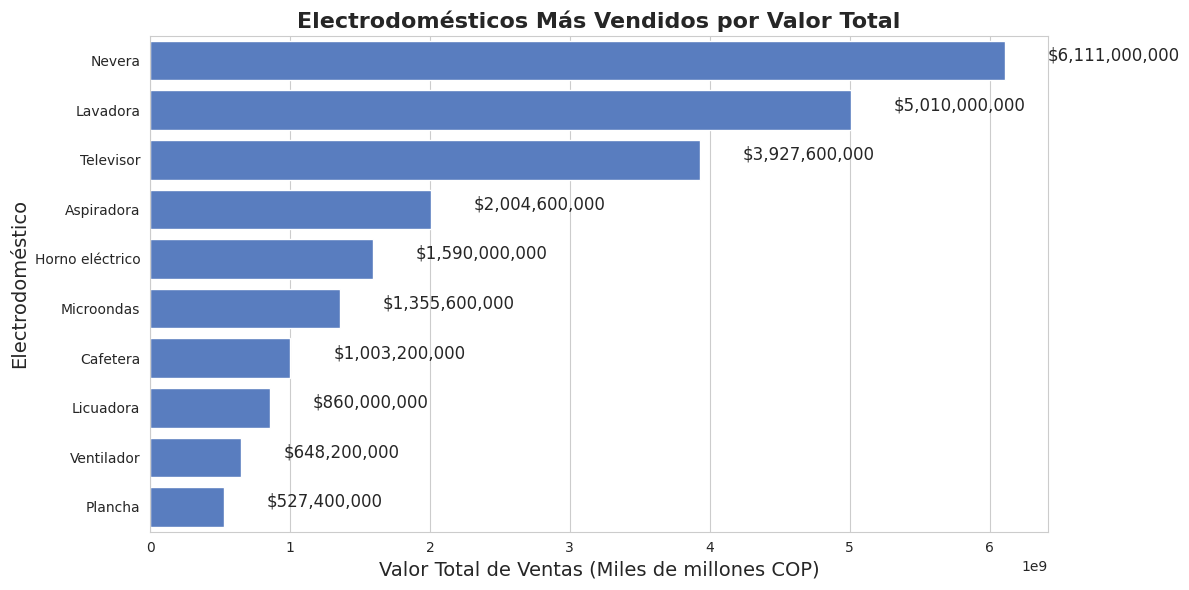

In [15]:
# Agrupar y ordenar los datos
ventas_por_valor = compras.groupby('Electrodoméstico')['Valor Total'].sum().sort_values(ascending=False)

# Configurar estilo profesional
sns.set_style("whitegrid")
sns.set_palette("muted")

# Crear la figura
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=ventas_por_valor.values, y=ventas_por_valor.index)

# Personalizar etiquetas y título
ax.set_xlabel("Valor Total de Ventas (Miles de millones COP)", fontsize=14)
ax.set_ylabel("Electrodoméstico", fontsize=14)
ax.set_title("Electrodomésticos Más Vendidos por Valor Total", fontsize=16, fontweight="bold")

# Agregar etiquetas con formato de moneda
for i in range(len(ventas_por_valor)):
    ax.text(ventas_por_valor.values[i] + 0.05 * ventas_por_valor.max(), i, f"${ventas_por_valor.values[i]:,.0f}", ha='left', fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

# Pregunta 3
¿Cuál es el ticket promedio por compra?

In [ ]:
Promedio_compra = compras.groupby('ID Compra')['Valor Total'].sum().mean()
print(f'El ticket promedio por compra es de ${Promedio_compra:,.0f}')

El ticket promedio por compra es de $2,050,886


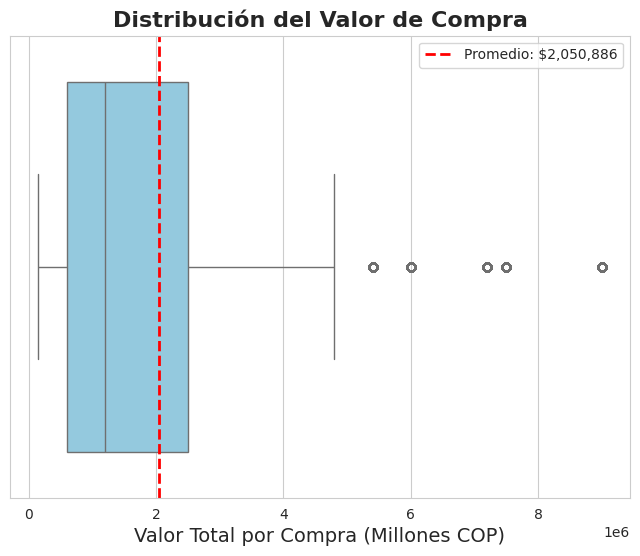

In [17]:
# Agrupar por 'ID Compra' y calcular el total de cada compra
compras_por_ticket = compras.groupby('ID Compra')['Valor Total'].sum()

# Calcular el ticket promedio
promedio_compra = compras_por_ticket.mean()

# Configurar estilo profesional
sns.set_style("whitegrid")
sns.set_palette("muted")

# Crear la figura
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x=compras_por_ticket, color="skyblue")

# Agregar una línea vertical con el ticket promedio
plt.axvline(promedio_compra, color='red', linestyle='dashed', linewidth=2, label=f'Promedio: ${promedio_compra:,.0f}')

# Personalizar etiquetas y título
ax.set_xlabel("Valor Total por Compra (Millones COP)", fontsize=14)
ax.set_title("Distribución del Valor de Compra", fontsize=16, fontweight="bold")
plt.legend()

# Mostrar gráfico
plt.show()

# Pregunta 4
¿Cuántas compras se realizaron por año?

In [ ]:
compras.groupby('Ano_de_compra')['ID Compra'].count().sort_values(ascending=False)

,ID Compra
Ano_de_compra,
2024,3766
2022,3739
2023,3728


# Pregunta 5
¿Y por mes?

In [ ]:
compras.groupby('Mes_de_compra')['ID Compra'].count().sort_values(ascending=False)

,ID Compra
Mes_de_compra,
8,1035
1,1004
11,970
10,945
7,940
5,940
12,935
6,919
9,919


In [23]:
meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

In [24]:
compras['Mes'] = compras['Mes_de_compra'].map(meses)

In [25]:
compras.groupby('Mes')['ID Compra'].count().sort_values(ascending=False)

,ID Compra
Mes,
Agosto,1033
Enero,1002
Noviembre,968
Octubre,944
Julio,938
Mayo,936
Diciembre,933
Septiembre,919
Junio,918


# Pregunta 6
¿Cuál es la hora del día con más compras?

In [27]:
ventas_hora = compras.groupby('Hora')['ID Compra'].count().sort_values(ascending=False)

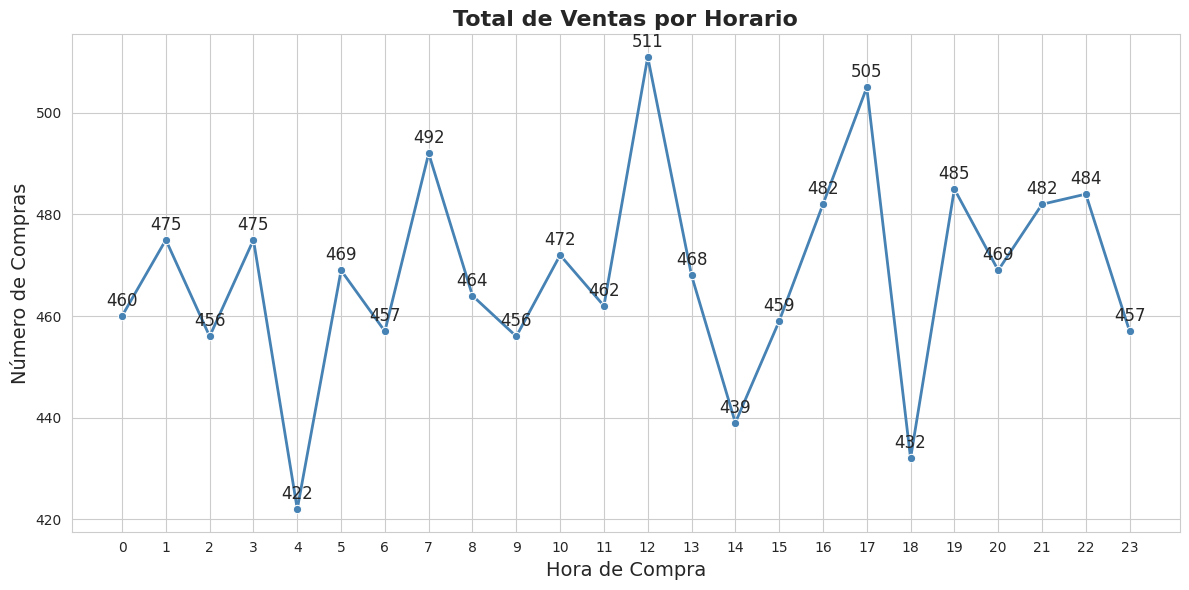

In [36]:
sns.set_style("whitegrid")
sns.set_palette("muted")
plt.figure(figsize=(12, 6))

ax =sns.lineplot(x=ventas_hora.index, y=ventas_hora.values, marker="o", linewidth=2, color="steelblue")

# Personalizar etiquetas y título
ax.set_xlabel("Hora de Compra", fontsize=14)
ax.set_ylabel("Número de Compras", fontsize=14)
ax.set_title("Total de Ventas por Horario", fontsize=16, fontweight="bold")

for i in range(len(ventas_hora)):
    ax.text(ventas_hora.index[i], ventas_hora.values[i] + 2, str(ventas_hora.values[i]), ha='center', fontsize=12)

# Ajustar diseño
plt.xticks(ticks=ventas_hora.index, labels=ventas_hora.index)
plt.tight_layout()
plt.show()

# Pregunta 7
¿Qué cliente compró más unidades?

In [52]:
ventas_por_cliente = compras.groupby(['Nombre','Apellido'])['Cantidad'].sum().sort_values(ascending=False).head(10)

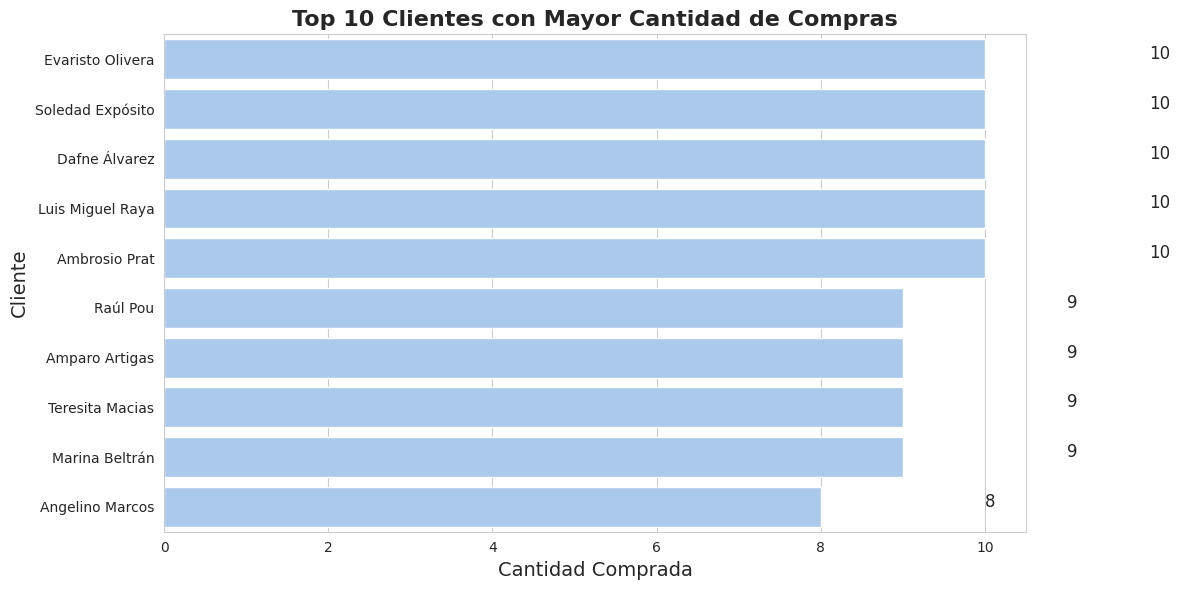

In [53]:
# Convertir el índice (nombre y apellido) en un formato más legible
ventas_por_cliente.index = [f"{nombre} {apellido}" for nombre, apellido in ventas_por_cliente.index]

# Configurar estilo profesional
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Crear la figura
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=ventas_por_cliente.values, y=ventas_por_cliente.index)

# Personalizar etiquetas y título
ax.set_xlabel("Cantidad Comprada", fontsize=14)
ax.set_ylabel("Cliente", fontsize=14)
ax.set_title("Top 10 Clientes con Mayor Cantidad de Compras", fontsize=16, fontweight="bold")

# Agregar valores sobre las barras
for i in range(len(ventas_por_cliente)):
    ax.text(ventas_por_cliente.values[i] + 2, i, str(ventas_por_cliente.values[i]), ha='left', fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

# Pregunta 8
¿Cuántas compras tienen un valor total mayor a $5.000.000?

In [ ]:
superiores_5m = compras.loc[compras['Valor Total'] > 5000000]
superiores_5m

,ID Compra,Nombre,Apellido,Electrodoméstico,Cantidad,Valor Unitario,Valor Total,Fecha Compra,Hora Compra,Ano_de_compra,Mes_de_compra,Hora,Categoria,Valor_medio,Mes
0,CL-00001,Marcia,Parra,Nevera,5,1800000,9000000,2023-07-12,1900-01-01 03:27:54,2023,7,3,Cocina,1800000,Julio
3,CL-00005,Ambrosio,Prat,Lavadora,5,1500000,7500000,2022-09-08,1900-01-01 13:57:58,2022,9,13,Aseo,1500000,Septiembre
4,CL-00006,Roldán,Elías,Nevera,5,1800000,9000000,2022-09-20,1900-01-01 05:07:39,2022,9,5,Cocina,1800000,Septiembre
19,CL-00021,Florinda,Cases,Televisor,5,1200000,6000000,2023-01-15,1900-01-01 08:12:09,2023,1,8,Confort,1200000,Enero
21,CL-00023,Salomé,Ros,Nevera,5,1800000,9000000,2023-10-21,1900-01-01 02:54:53,2023,10,2,Cocina,1800000,Octubre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11188,CL-11210,Goyo,Plana,Nevera,3,1800000,5400000,2022-02-02,1900-01-01 19:07:34,2022,2,19,Cocina,1800000,Febrero
11190,CL-11212,Maite,Torrent,Nevera,4,1800000,7200000,2022-10-16,1900-01-01 06:27:36,2022,10,6,Cocina,1800000,Octubre
11191,CL-11213,Sebastián,Alcalde,Lavadora,5,1500000,7500000,2023-05-08,1900-01-01 12:36:06,2023,5,12,Aseo,1500000,Mayo
11212,CL-11234,Isidro,Duran,Televisor,5,1200000,6000000,2022-01-30,1900-01-01 20:09:15,2022,1,20,Confort,1200000,Enero


In [ ]:
conteo = superiores_5m['ID Compra'].count()
print(f'Hay {conteo} compras con un valor total mayor a $5.000.000')

Hay 1323 compras con un valor total mayor a $5.000.000


# Pregunta 9
¿Cuál es la media y mediana del Valor Unitario?

In [ ]:
compras.describe().T

,count,mean,min,25%,50%,75%,max,std
Cantidad,11233.0,2.978634,1.0,2.0,3.0,4.0,5.0,1.414933
Valor Unitario,11233.0,687794.890056,150000.0,250000.0,400000.0,1200000.0,1800000.0,562913.877449
Valor Total,11233.0,2050885.782961,150000.0,600000.0,1200000.0,2500000.0,9000000.0,2101611.562955
Fecha Compra,11233,2023-07-03 19:32:58.349506048,2022-01-01 00:00:00,2022-10-04 00:00:00,2023-07-05 00:00:00,2024-04-04 00:00:00,2024-12-31 00:00:00,NaN
Hora Compra,11233,1900-01-01 12:03:23.963322368,1900-01-01 00:00:03,1900-01-01 06:06:58,1900-01-01 12:05:14,1900-01-01 18:00:03,1900-01-01 23:59:56,NaN
Ano_de_compra,11233.0,2023.002404,2022.0,2022.0,2023.0,2024.0,2024.0,0.817419
Mes_de_compra,11233.0,6.547405,1.0,4.0,7.0,10.0,12.0,3.455185
Hora,11233.0,11.559245,0.0,6.0,12.0,18.0,23.0,6.914406
Valor_medio,11233.0,687794.890056,150000.0,250000.0,400000.0,1200000.0,1800000.0,562913.877449


Text(0.5, 1.0, 'Distribución del Valor Unitario')

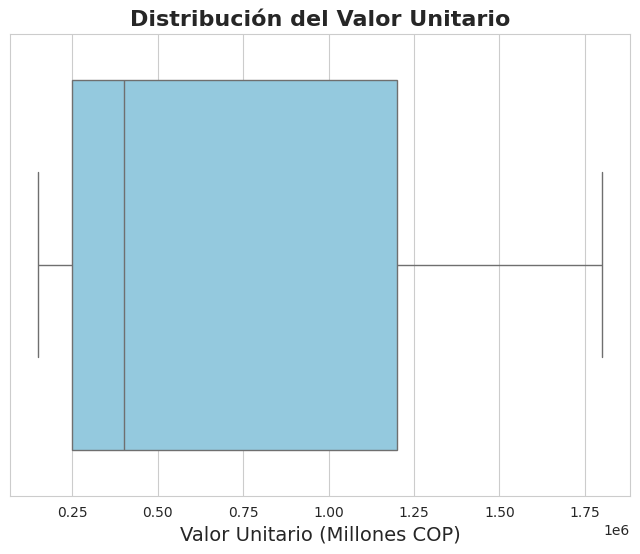

In [51]:
# Crear la figura
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x=compras['Valor Unitario'], color="skyblue")

ax.set_xlabel("Valor Unitario (Millones COP)", fontsize=14)
ax.set_title("Distribución del Valor Unitario", fontsize=16, fontweight="bold")

# Pregunta 10
¿Cuántas compras no tienen registrado el nombre del cliente?

In [57]:
clientes_nulos = pd.read_excel('/content/drive/MyDrive/Shareddrives/gestion &almacenamiento/Taller semana 7 /Dataset_Clientes_Colombia.xlsx')

In [58]:
nulos_cuenta = clientes_nulos['Nombre'].isnull().sum()
print(f'La cantidad de compras sin nombre registrado son {nulos_cuenta}')

La cantidad de compras sin nombre registrado son 21


# Pregunta 11
¿Cuál es el producto más común entre las compras duplicadas?

In [59]:
productos_duplicados = clientes_nulos[clientes_nulos.duplicated(subset=['Nombre', 'Apellido', 'Electrodoméstico', 'Cantidad',
                                            'Valor Unitario', 'Valor Total', 'Fecha Compra',
                                            'Hora Compra'], keep=False)]
productos_duplicados.head()

,ID Compra,Nombre,Apellido,Electrodoméstico,Cantidad,Valor Unitario,Valor Total,Fecha Compra,Hora Compra
0,CL-00001,Marcia,PARRA,Nevera,5.0,1800000,9000000,2023-07-12,03:27:54
1,CL-00002,Alfonso,ROMA,Plancha,1.0,150000,150000,2023-01-16,04:34:05
3,CL-00004,Gonzalo,SEBASTIÁN,Licuadora,3.0,250000,750000,2024-05-23,15:39:00
218,CL-00219,Iker,VERA,Cafetera,4.0,300000,1200000,2024-05-07,08:29:27
795,CL-00796,Domitila,MARQUEZ,Horno eléctrico,3.0,500000,1500000,2022-11-21,05:13:13


In [60]:
duplicados_product = productos_duplicados.groupby('Electrodoméstico')['ID Compra'].count().sort_values(ascending=False)

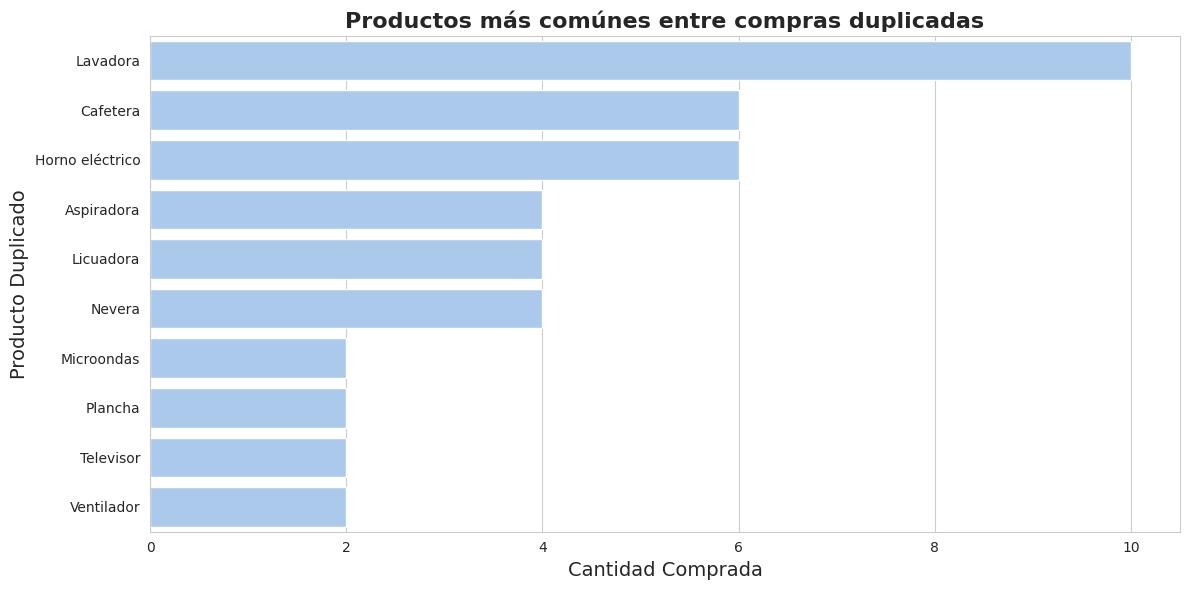

In [64]:
# Configurar estilo profesional
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Crear la figura
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=duplicados_product.values, y=duplicados_product.index)

# Personalizar etiquetas y título
ax.set_xlabel("Cantidad Comprada", fontsize=14)
ax.set_ylabel("Producto Duplicado", fontsize=14)
ax.set_title("Productos más comúnes entre compras duplicadas", fontsize=16, fontweight="bold")

# Ajustar diseño
plt.tight_layout()
plt.show()

# Pregunta 12
¿Hay alguna relación entre la cantidad comprada y el valor total?

In [66]:
resultados_12 = compras.groupby('Cantidad')['Valor Total'].mean().sort_values(ascending=False)
# Aplicar formato de miles
resultados_formateados_12 = resultados_12.apply(lambda x: f"${x:,.0f}")
resultados_formateados_12

,Valor Total
Cantidad,
5,"$3,449,228"
4,"$2,743,306"
3,"$2,090,134"
2,"$1,357,916"
1,"$687,810"


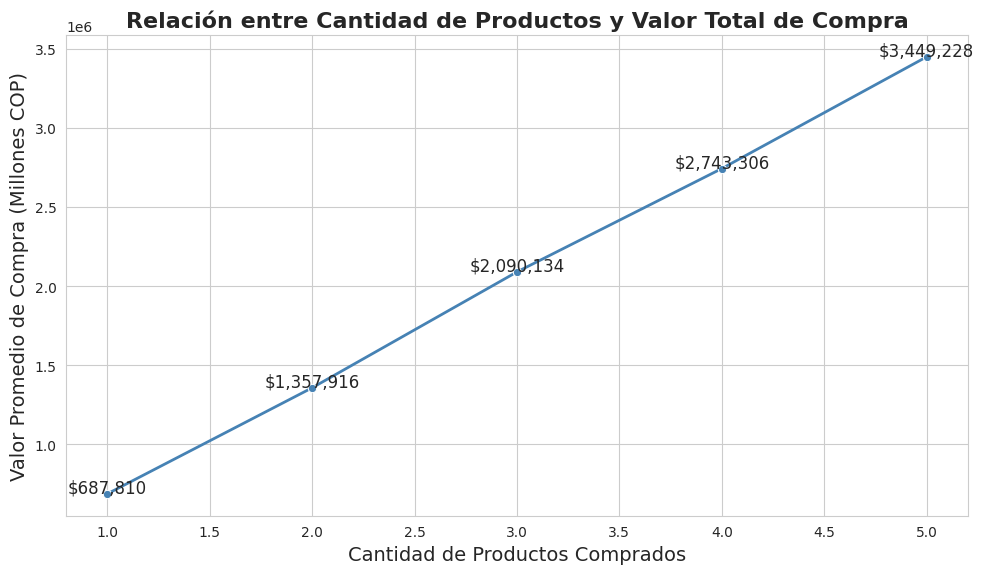

In [69]:
# Configurar estilo profesional
sns.set_style("whitegrid")
sns.set_palette("muted")

# Crear la figura
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=resultados_12.index, y=resultados_12.values, marker="o", linewidth=2, color="steelblue")

# Personalizar etiquetas y título
ax.set_xlabel("Cantidad de Productos Comprados", fontsize=14)
ax.set_ylabel("Valor Promedio de Compra (Millones COP)", fontsize=14)
ax.set_title("Relación entre Cantidad de Productos y Valor Total de Compra", fontsize=16, fontweight="bold")

# Agregar valores sobre los puntos
for i in range(len(resultados_12)):
    ax.text(resultados_12.index[i], resultados_12.values[i] + 5000, f"${resultados_12.values[i]:,.0f}", ha='center', fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

# Pregunta 13 y 14
¿Cuántas categorías de electrodomésticos hay?
¿Qué categoría vende más?

In [ ]:
compras['Categoria'].value_counts().sort_values(ascending=False)

,count
Categoria,
Cocina,5637
Aseo,3417
Confort,2179


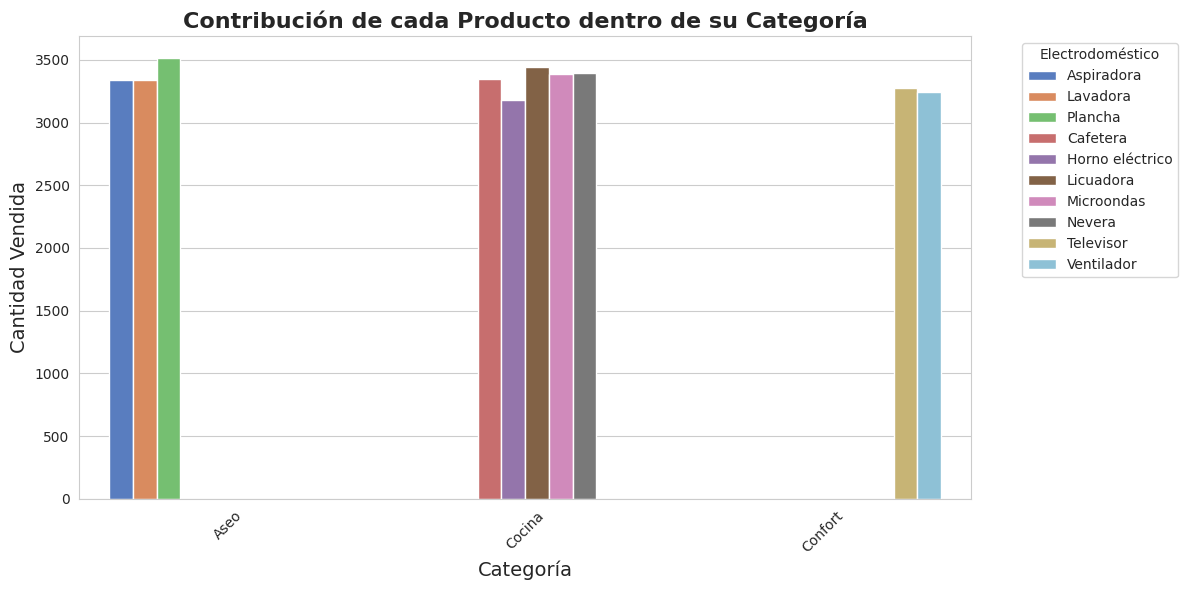

In [79]:
# Agrupar por categoría y producto, sumando las cantidades vendidas
ventas_por_categoria_producto = compras.groupby(['Categoria', 'Electrodoméstico'])['Cantidad'].sum().reset_index()

# Configurar estilo profesional
sns.set_style("whitegrid")

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ventas_por_categoria_producto, x='Categoria', y='Cantidad', hue='Electrodoméstico')

# Personalizar etiquetas y título
ax.set_xlabel("Categoría", fontsize=14)
ax.set_ylabel("Cantidad Vendida", fontsize=14)
ax.set_title("Contribución de cada Producto dentro de su Categoría", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)

# Ajustar diseño
plt.legend(title="Electrodoméstico", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Pregunta 15
¿Hay estacionalidad en las compras? ¿En qué meses se compra más?

In [5]:
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Agrupar y contar el número de compras por mes
ventas_por_mes = compras.groupby('Mes_de_compra')['ID Compra'].count().sort_index()

In [6]:
# Convertir números a nombres de mes
ventas_por_mes.index = ventas_por_mes.index.map(meses)

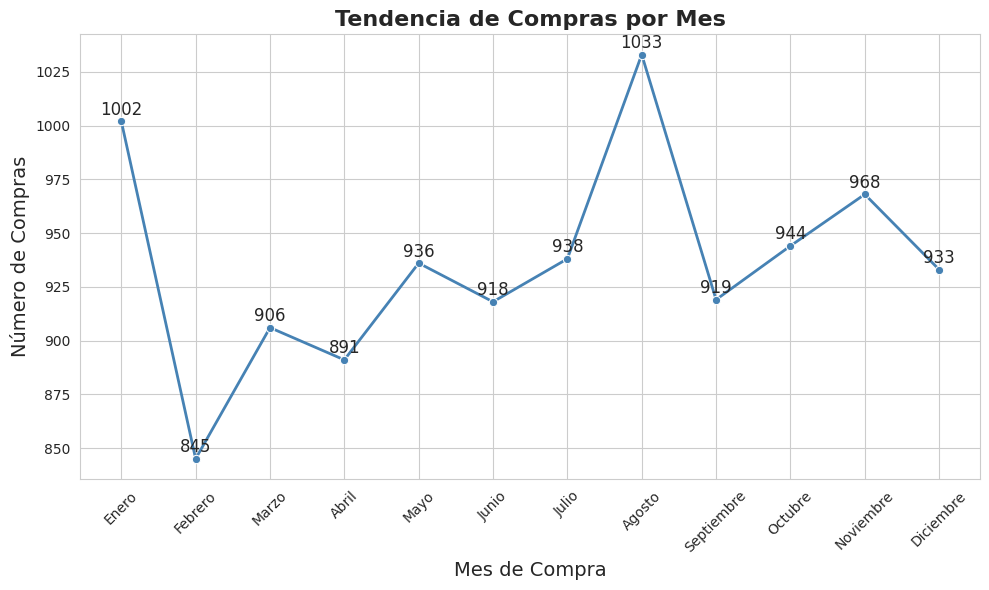

In [7]:
# Configurar estilo profesional
sns.set_style("whitegrid")
sns.set_palette("muted")

# Crear la figura
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=ventas_por_mes.index, y=ventas_por_mes.values, marker="o", linewidth=2, color="steelblue")

# Personalizar etiquetas y título
ax.set_xlabel("Mes de Compra", fontsize=14)
ax.set_ylabel("Número de Compras", fontsize=14)
ax.set_title("Tendencia de Compras por Mes", fontsize=16, fontweight="bold")

# Asegurar que el eje X muestre los nombres de los meses
plt.xticks(rotation=45)

# Agregar valores sobre los puntos
for i in range(len(ventas_por_mes)):
    ax.text(i, ventas_por_mes.values[i] + 3, str(ventas_por_mes.values[i]), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [9]:
estaciones = {
    1: 'Invierno',
    2: 'Invierno',
    3: 'Primavera',
    4: 'Primavera',
    5: 'Primavera',
    6: 'Verano',
    7: 'Verano',
    8: 'Verano',
    9: 'Otoño',
    10: 'Otoño',
    11: 'Otoño',
    12: 'Invierno'
}

In [10]:
compras['Estacion'] = compras['Mes_de_compra'].map(estaciones)

In [11]:
ventas_por_estacion = compras.groupby('Estacion')['ID Compra'].count().sort_values(ascending=False)

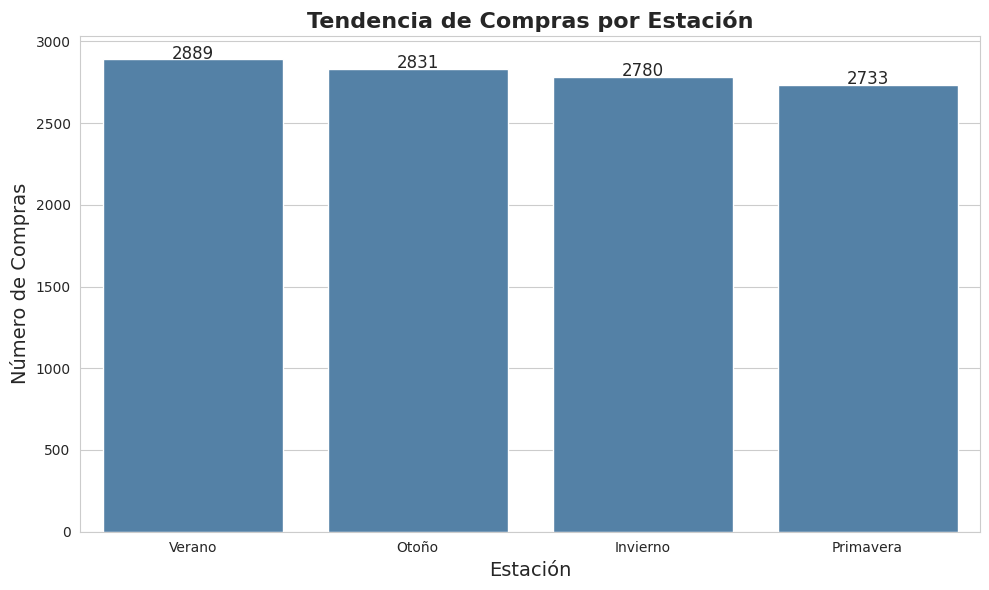

In [12]:
# Configurar estilo profesional
sns.set_style("whitegrid")
sns.set_palette("muted")

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ventas_por_estacion.index, y=ventas_por_estacion.values, color="steelblue")

# Personalizar etiquetas y título
ax.set_xlabel("Estación", fontsize=14)
ax.set_ylabel("Número de Compras", fontsize=14)
ax.set_title("Tendencia de Compras por Estación", fontsize=16, fontweight="bold")

# Agregar valores sobre las barras
for i in range(len(ventas_por_estacion)):
    ax.text(i, ventas_por_estacion.values[i] + 5, str(ventas_por_estacion.values[i]), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Pregunta 16
¿Cuál es la proporción entre compras de lavadoras y neveras?

In [14]:
#¿Cuál es la proporción entre compras de lavadoras y neveras?
lavadoras = compras.loc[compras['Electrodoméstico'] == 'Lavadora']
neveras = compras.loc[compras['Electrodoméstico'] == 'Nevera']

compras_lavadoras = lavadoras['Cantidad'].sum()
compras_neveras = neveras['Cantidad'].sum()

In [15]:
if compras_neveras > 0:  # Para evitar división por cero
    proporcion = compras_lavadoras / compras_neveras
    print(f"La proporción entre compras de lavadoras y neveras es: {proporcion:.2f}")
else:
    print("No hay compras de neveras registradas en los datos.")

La proporción entre compras de lavadoras y neveras es: 0.98


<ipython-input-17-8f79b90ce86b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categorias, y=compras_totales, palette=["steelblue", "salmon"])


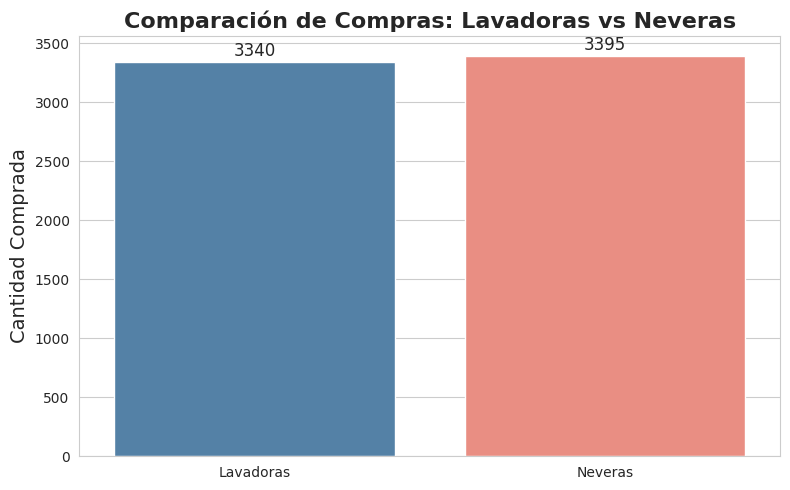

In [17]:
categorias = ['Lavadoras', 'Neveras']
compras_totales = [compras_lavadoras, compras_neveras]

# Configurar estilo profesional
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=categorias, y=compras_totales, palette=["steelblue", "salmon"])

# Personalizar etiquetas y título
ax.set_ylabel("Cantidad Comprada", fontsize=14)
ax.set_title("Comparación de Compras: Lavadoras vs Neveras", fontsize=16, fontweight="bold")

# Agregar valores sobre las barras
for i in range(len(compras_totales)):
    ax.text(i, compras_totales[i] + 50, str(compras_totales[i]), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Pregunta 17
¿Cuántas compras hay de productos de cocina vs. climatización?

In [19]:
cocina = compras.loc[compras['Categoria'] == 'Cocina']
confort = compras.loc[compras['Categoria'] == 'Confort']

compras_cocina = cocina['Cantidad'].sum()
compras_confort = confort['Cantidad'].sum()

In [20]:
if compras_confort > 0:  # Para evitar división por cero
    proporcion = compras_cocina / compras_confort
    print(f"La proporción entre compras de cocina y confort es: {proporcion:.2f}")

La proporción entre compras de cocina y confort es: 2.57


<ipython-input-21-c285b1ef6239>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categorias, y=compras_totales, palette=["steelblue", "salmon"])


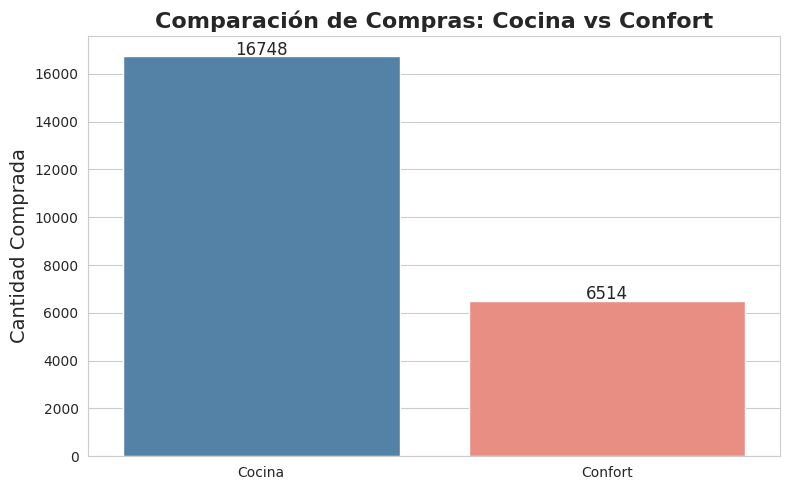

In [21]:
categorias = ['Cocina', 'Confort']
compras_totales = [compras_cocina, compras_confort]

# Configurar estilo profesional
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=categorias, y=compras_totales, palette=["steelblue", "salmon"])

# Personalizar etiquetas y título
ax.set_ylabel("Cantidad Comprada", fontsize=14)
ax.set_title("Comparación de Compras: Cocina vs Confort", fontsize=16, fontweight="bold")

# Agregar valores sobre las barras
for i in range(len(compras_totales)):
    ax.text(i, compras_totales[i] + 50, str(compras_totales[i]), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [22]:
horno = compras.loc[compras['Electrodoméstico'] == 'Horno eléctrico']
cafetera = compras.loc[compras['Electrodoméstico'] == 'Cafetera']

compras_horno = horno['Cantidad'].sum()
compras_cafetera = cafetera['Cantidad'].sum()

In [23]:
if compras_cafetera > 0:  # Para evitar división por cero
    proporcion = compras_horno / compras_cafetera
    print(f"La proporción entre compras de horno y cafetera es: {proporcion:.2f}")

La proporción entre compras de horno y cafetera es: 0.95


<ipython-input-24-67669f311265>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categorias, y=compras_totales, palette=["steelblue", "salmon"])


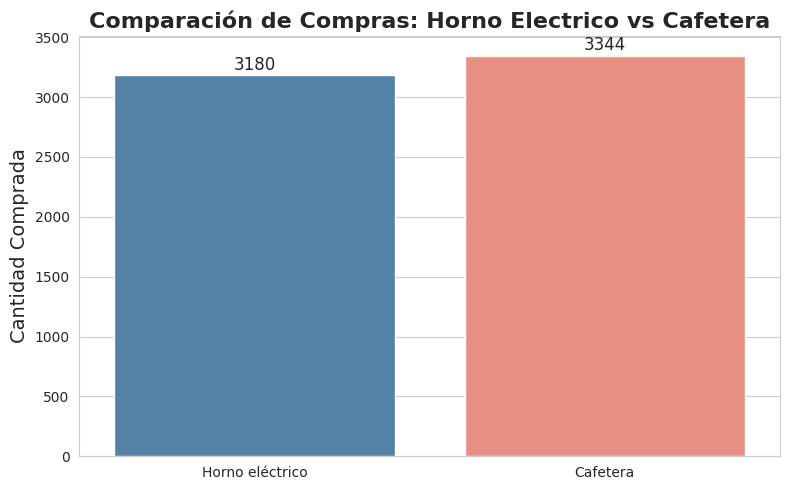

In [24]:
categorias = ['Horno eléctrico', 'Cafetera']
compras_totales = [compras_horno, compras_cafetera]

# Configurar estilo profesional
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=categorias, y=compras_totales, palette=["steelblue", "salmon"])

# Personalizar etiquetas y título
ax.set_ylabel("Cantidad Comprada", fontsize=14)
ax.set_title("Comparación de Compras: Horno Electrico vs Cafetera", fontsize=16, fontweight="bold")

# Agregar valores sobre las barras
for i in range(len(compras_totales)):
    ax.text(i, compras_totales[i] + 50, str(compras_totales[i]), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Pregunta 18
¿Cuántos productos se vendieron en total?

In [ ]:
sumatoria_cantidad = compras['Cantidad'].sum()
print(f'La cantidad total de productos vendidos es de {sumatoria_cantidad}')

La cantidad total de productos vendidos es de 33459


# Pregunta 19
¿Cuál es el promedio de productos por compra?

In [26]:
promedio_productos = compras['Cantidad'].mean()
print(f'El promedio de productos por compra es de {np.round(promedio_productos,2)}')

El promedio de productos por compra es de 2.98


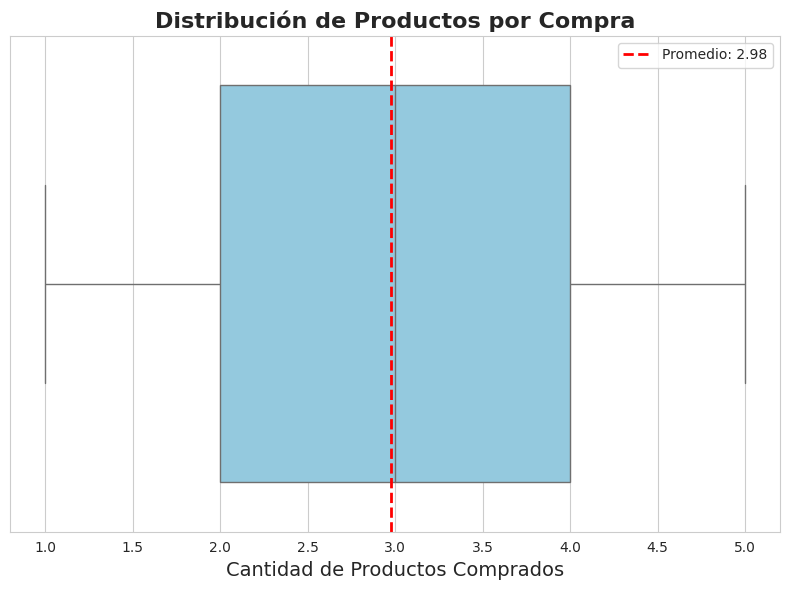

In [28]:
# Configurar estilo profesional
sns.set_style("whitegrid")
sns.set_palette("muted")

# Crear el boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x=compras['Cantidad'], color="skyblue")

# Agregar línea del promedio
plt.axvline(promedio_productos, color='red', linestyle='dashed', linewidth=2, label=f'Promedio: {np.round(promedio_productos,2)}')

# Personalizar etiquetas y título
ax.set_xlabel("Cantidad de Productos Comprados", fontsize=14)
ax.set_title("Distribución de Productos por Compra", fontsize=16, fontweight="bold")
plt.legend()

plt.tight_layout()
plt.show()

# Pregunta 20
¿Qué porcentaje de las compras tiene más de una unidad?

In [30]:
mas_1 = compras.loc[compras['Cantidad'] > 1]
compras_mas_1 = len(mas_1)

In [31]:
if len(compras)>0:
  porcentaje = (compras_mas_1/len(compras))*100
  print(f'El porcentaje de compras con más de una unidad es de {np.round(porcentaje,2)}%')
#

El porcentaje de compras con más de una unidad es de 79.55%


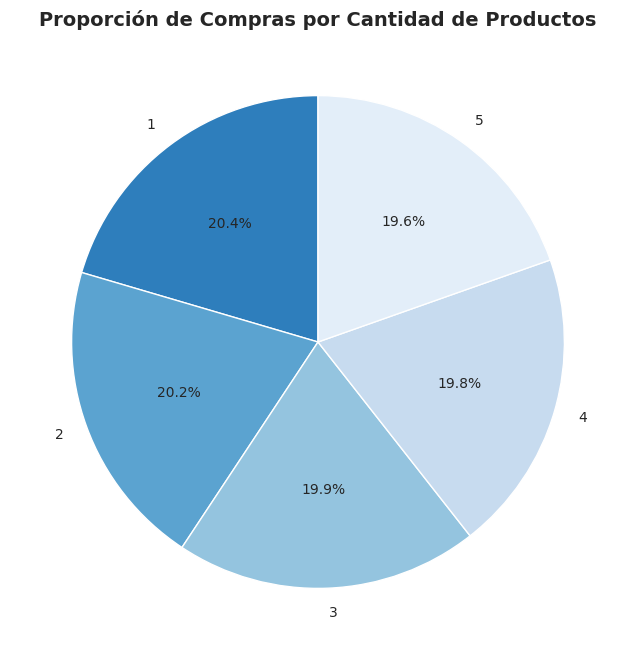

In [33]:
# Contar la frecuencia de cada cantidad comprada en porcentaje
frecuencia_cantidades = compras['Cantidad'].value_counts(normalize=True) * 100

# Crear el gráfico de pastel con todas las cantidades
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_cantidades, labels=frecuencia_cantidades.index, autopct='%1.1f%%', colors=plt.cm.Blues_r(np.linspace(0.3, 0.9, len(frecuencia_cantidades))), startangle=90, wedgeprops={'edgecolor': 'white'})

# Personalizar título
plt.title("Proporción de Compras por Cantidad de Productos", fontsize=14, fontweight="bold")

plt.show()